In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)
df_SPX

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%
...,...,...,...,...,...
2006-01-10,"1,289.69","1,290.15","1,290.15","1,283.76",-0.04%
2006-01-09,"1,290.15","1,285.45","1,290.78","1,284.82",0.37%
2006-01-06,"1,285.45","1,273.48","1,286.09","1,273.48",0.94%


In [3]:
df_SPX['Price'] = pd.to_numeric(df_SPX['Price'].str.replace(',',''))
print(df_SPX.dtypes)
df_SPX.head()

Price       float64
Open         object
High         object
Low          object
Change %     object
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,"2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,2687.54,"2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,2682.62,"2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,2680.50,"2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,2683.34,"2,684.22","2,685.35","2,678.13",-0.05%


In [4]:
df_SPX['Open'] = pd.to_numeric(df_SPX['Open'].str.replace(',',''))
df_SPX['High'] = pd.to_numeric(df_SPX['High'].str.replace(',',''))
df_SPX['Low'] = pd.to_numeric(df_SPX['Low'].str.replace(',',''))
df_SPX['Change %'] = pd.to_numeric(df_SPX['Change %'].str.replace('%',''))
print(df_SPX.dtypes)
df_SPX.head()

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05


In [5]:
display(df_SPX.sort_values(by=['Date']))

,Price,Open,High,Low,Change %
Date,,,,,
2006-01-04,1273.46,1268.80,1275.37,1267.74,0.37
2006-01-05,1273.48,1273.46,1276.91,1270.30,0.00
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
...,...,...,...,...,...
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08


In [17]:
df1 = df_SPX.sort_values('Date').query("Date >= '2015-06-01' and Date <= '2016-06-30'")[['High','Low']]
df1

,High,Low
Date,,
2015-06-01,2119.15,2102.54
2015-06-02,2117.59,2099.14
2015-06-03,2121.92,2109.61
2015-06-04,2112.89,2093.23
2015-06-05,2100.99,2085.67
...,...,...
2016-06-24,2103.81,2032.57
2016-06-27,2031.45,1991.68
2016-06-28,2036.09,2006.67


In [18]:
df1.head(10)\
.style\
.highlight_max(color='lightgreen')\
.highlight_min(color='red')

,High,Low
Date,,
2015-06-01 00:00:00,2119.150000,2102.540000
2015-06-02 00:00:00,2117.590000,2099.140000
2015-06-03 00:00:00,2121.920000,2109.610000
2015-06-04 00:00:00,2112.890000,2093.230000
2015-06-05 00:00:00,2100.990000,2085.670000
2015-06-08 00:00:00,2093.010000,2079.110000
2015-06-09 00:00:00,2085.620000,2072.140000
2015-06-10 00:00:00,2108.500000,2081.120000
2015-06-11 00:00:00,2115.020000,2106.240000


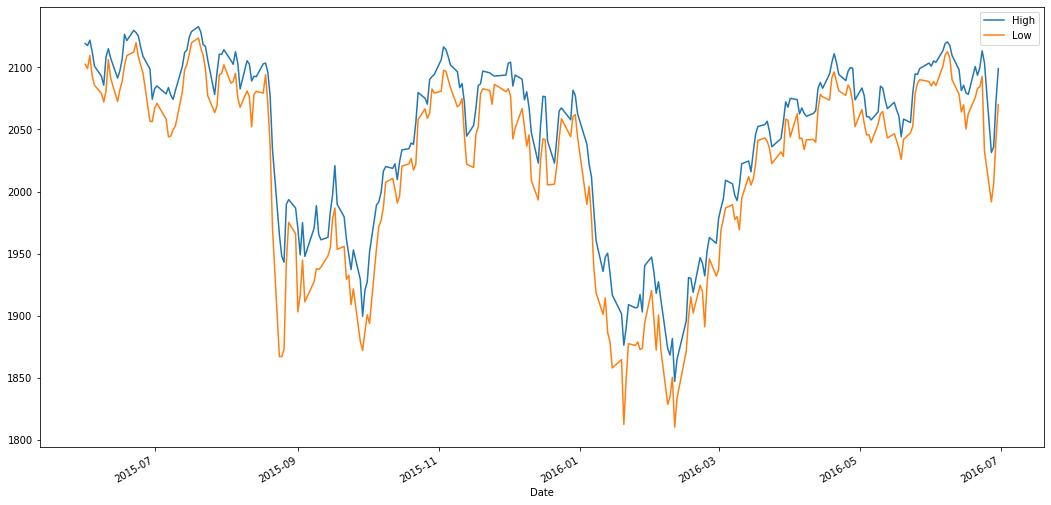

In [19]:
df1.plot(figsize=(18,9))

In [20]:
byM = pd.Grouper(freq="BM")

funcs = ['max','min','mean']
df2 = df1.groupby(byM).agg(funcs)
df2

High                            Low                      
                max      min         mean      max      min         mean
Date                                                                    
2015-06-30  2129.87  2074.28  2109.400455  2119.89  2056.32  2092.077273
2015-07-31  2132.82  2074.28  2102.516818  2123.65  2044.02  2083.963636
2015-08-31  2112.66  1943.09  2058.501905  2095.27  1867.01  2024.972381
2015-09-30  2020.86  1899.48  1962.428095  1986.73  1871.91  1929.715714
2015-10-30  2094.32  1927.21  2030.578636  2082.63  1893.70  2009.497727
2015-11-30  2116.48  2044.64  2089.545500  2097.51  2019.39  2070.573000
2015-12-31  2104.27  2022.90  2067.892273  2082.93  1993.26  2041.347273
2016-01-29  2038.20  1876.18  1939.557895  2004.17  1812.29  1898.273158
2016-02-29  1962.96  1847.00  1917.261000  1945.78  1810.10  1887.279500
2016-03-31  2072.21  1978.35  2027.080000  2058.27  1937.09  2008.560909
2016-04-29  2111.05  2060.63  2083.424762  2096.32  2033.80  2065.265238
2016-05-31  2103.48  2044.21  2073.309524  2090.06  2025.91  2055.414286
2016-06-30  2120.55  2031.45  2093.831818  2112.71  1991.68  2072.063636

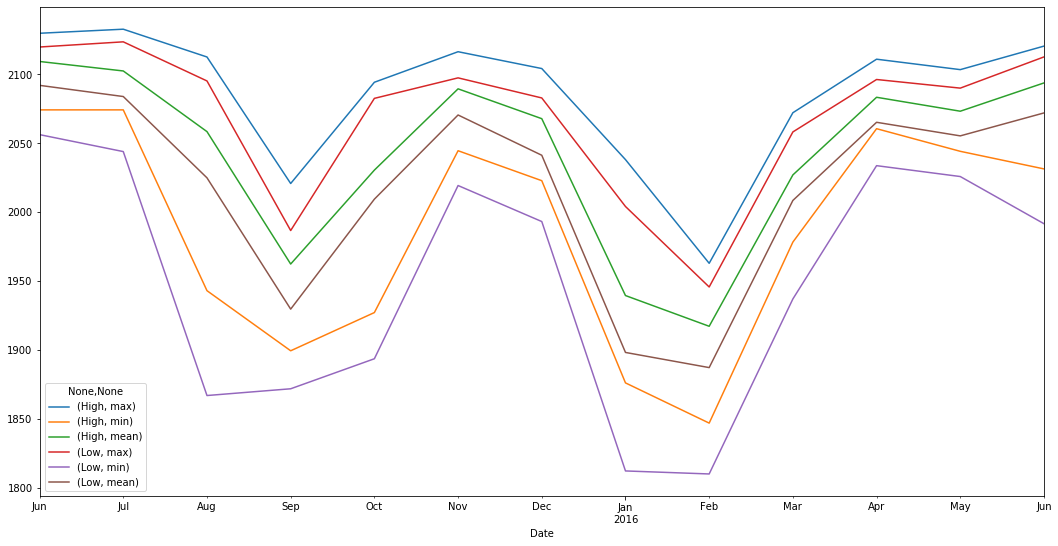

In [22]:
df2.plot(figsize=(18,9))